### Data Preparation 

To prepare data for our assignment we:  
- downloaded [world bank data](http://data.worldbank.org/indicator/NY.GDP.MKTP.CN)
- fixed the format of GDP data as it contained additional lines not supported by pandas
- removed last unnamed columns from booth GDP and Metadata csv files running the following code: 
`DataFrame.drop(DataFrame.columns[-1], axis=1)`


In [60]:
# Loading the data and importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

DF = pd.DataFrame

GDP = pd.read_csv("./Data/Countries_GDP.csv")
Country_Metadata = pd.read_csv("./Data/Metadata_Country.csv")
Deflation_Indicators = pd.read_csv("./Data/Deflation_Indicator.csv")

GDP = pd.merge(GDP, Deflation_Indicators, on='Country Code') # Add deflation indicators
GDP = pd.merge(GDP, Country_Metadata[['Country Code', 'Region']], on='Country Code') # Add regions 

GDP

# DF.head(Country_Metadata)

,Unnamed: 0,Country Name_x,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,Region
0,0,Aruba,ABW,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,111.060627987948,109.946912346958,106.452616082952,110.138037089452,116.765941637385,115.654945180086,109.973251540577,113.445414349983,121.056990382611,Latin America & Caribbean
1,2,Afghanistan,AFG,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,94.8324703031589,92.7485016686198,94.9778567679371,96.9451792533578,103.267439582288,110.457895899583,113.593791422896,124.278695318734,127.95939969937,South Asia
2,4,Angola,AGO,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,859.02869588617,1046.0756278831,1282.64054748492,1643.92310662772,1959.34269601225,2170.22881322863,3012.79241091361,3425.86414711837,4029.48557284815,Sub-Saharan Africa
3,5,Albania,ALB,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,105.880870312261,105.211011366062,106.737340734897,109.903729197689,111.003415842992,111.048999392741,114.873969805373,126.202351522151,133.857848604236,Europe & Central Asia
4,6,Andorra,AND,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,101.402572054216,101.755245516619,102.911703389108,103.953662239379,105.382768858012,106.556507462058,109.283140047975,113.913086675585,121.084599898998,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,261,Kosovo,XKX,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,116.704305489928,117.61372865617,118.131251577355,119.90194364905,121.056551572359,122.728472288513,130.233981017813,139.60914861591,145.980599795146,Europe & Central Asia
213,262,"Yemen, Rep.",YEM,GDP (current LCU),NY.GDP.MKTP.CN,NaN,NaN,NaN,NaN,NaN,...,3731.44426880556,3736.45973455039,4429.70626363653,5087.67998216372,..,..,..,..,..,Middle East & North Africa
214,263,South Africa,ZAF,GDP (current LCU),NY.GDP.MKTP.CN,6.249000e+09,6.590000e+09,7.010000e+09,7.753000e+09,8.540000e+09,...,100.000000176439,106.95217214959,112.806008890395,117.310685699107,122.722843148459,129.339315561787,137.796413208375,144.675859705926,151.626480693119,Sub-Saharan Africa
215,264,Zambia,ZMB,GDP (current LCU),NY.GDP.MKTP.CN,4.991000e+05,4.874000e+05,4.852000e+05,5.031000e+05,5.876000e+05,...,146.700105596621,166.616260348068,183.399244810868,196.992009958915,212.029336888599,241.530824495239,302.258382569342,320.818009618509,343.578859100779,Sub-Saharan Africa


Task 1
Które kraje miały największy wzrost gospodarczy w ostatnich 5 latach.

In [61]:
# Filter data from 2023 and 2019
GDP5Years = GDP[["Country Name_x", "2019_x", "2023_x", "2019_y", "2023_y", "Region"]].copy()

# Cast types
GDP['2019_y'] = pd.to_numeric(GDP['2019_y'], errors='coerce')
GDP['2023_y'] = pd.to_numeric(GDP['2023_y'], errors='coerce')

# Calculate differences
GDP5Years["Difference"] = (GDP["2023_x"] / GDP["2023_y"]) / (GDP["2019_x"] /GDP["2019_y"] )
A = GDP5Years.sort_values("Difference", ascending = False)

DF.head(A)


,Country Name_x,2019_x,2023_x,2019_y,2023_y,Region,Difference
81,Guyana,1.078729e+12,3.577758e+12,103.317329011879,91.0207112559976,Latin America & Caribbean,3.764710
191,Tajikistan,7.910980e+10,1.307915e+11,1092.19981804079,1351.70306949344,Europe & Central Asia,1.335888
90,Ireland,3.636749e+11,5.099518e+11,106.038960255681,116.316521116123,Europe & Central Asia,1.278321
39,"Congo, Dem. Rep.",8.531415e+13,1.622540e+14,673.855504173913,1003.10229185423,Sub-Saharan Africa,1.277603
192,Turkmenistan,1.583150e+11,2.122010e+11,256.936198508464,271.251253125031,Europe & Central Asia,1.269635


Task 2 Jak Polska wypada na tle innych krajów Europy? 

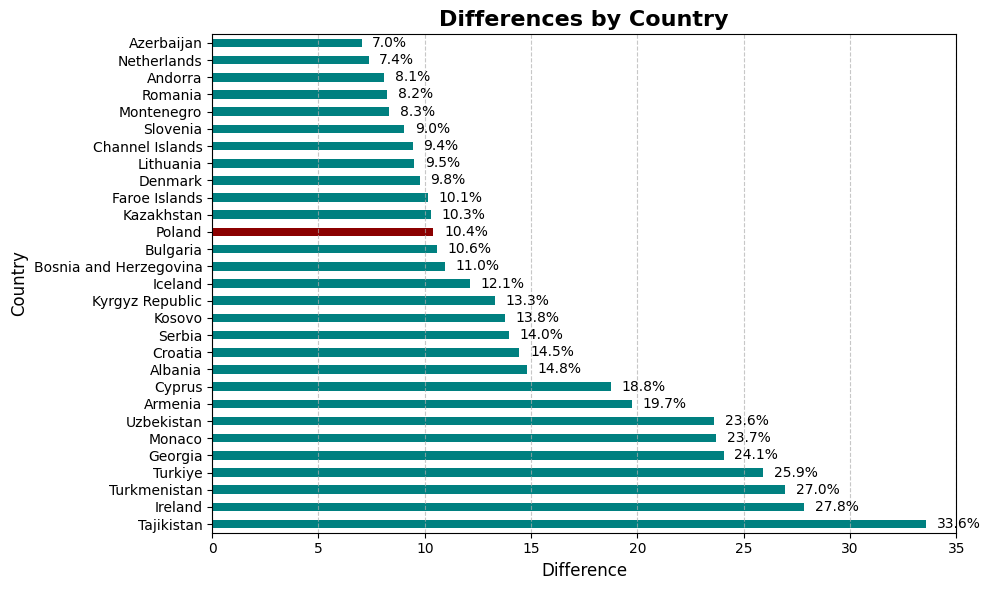

In [72]:
# Filter data for Europe & Central Asia

GDPEurope = DF(GDP5Years)[DF(GDP5Years)['Region'] == 'Europe & Central Asia']
GDPEurope = GDPEurope.sort_values("Difference", ascending = False).reset_index(drop=True)

# Plot the values 

GDPEurope['Percentage Difference'] = (GDPEurope['Difference'] - 1) * 100 # Add percentage 
colors = ['teal' if country != 'Poland' else 'darkred' for country in GDPEurope['Country Name_x']]

ax = GDPEurope.iloc[0:29].plot(
    kind='barh',
    x='Country Name_x',
    y='Percentage Difference',
    color= colors,
    figsize=(10, 6),
    legend=False
)

ax.set_xlim(0, 35)

# Add a title and axis labels
ax.set_title('Differences by Country', fontsize=16, fontweight='bold')
ax.set_xlabel('Difference', fontsize=12)
ax.set_ylabel('Country', fontsize=12)

# Customize tick parameters
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add gridlines 
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels to the bars
for i in ax.patches:
    ax.text(
        i.get_width() + 0.5,  # Adjust text placement
        i.get_y() + i.get_height() / 2,
        f'{i.get_width():.1f}%',  # Format as percentage
        va='center',
        fontsize=10
    )
# Show the plot
plt.tight_layout()
plt.show()

